In [2]:
import numpy as np
import torch
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'mathtext.fontset': 'stix', 
})

# 1. Energy error and Statistical error

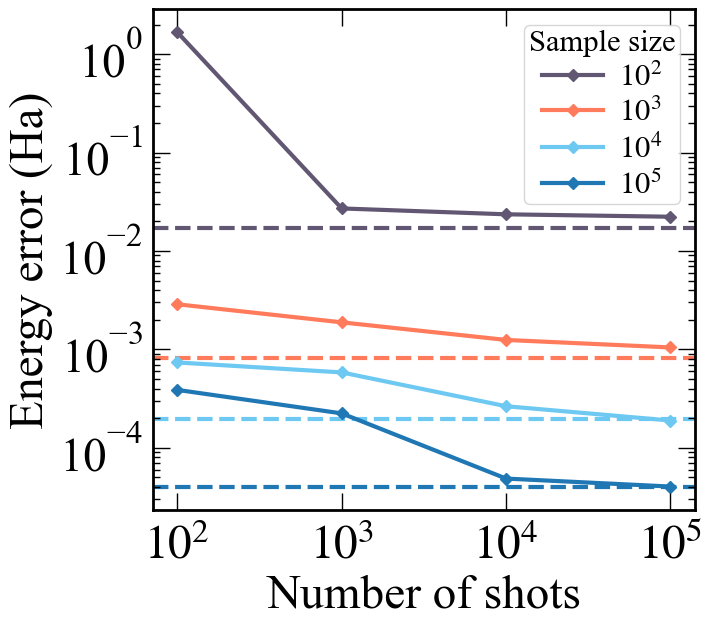

In [2]:
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 3,  
    'font.size': 34,
    'xtick.major.size': 12,         
    'ytick.major.size': 12,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': True,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 10,  
    'ytick.major.pad': 7,         
})


sample_size_list = [100, 1000, 10000, 100000]
num_shots_list = [100, 1000, 10000, 100000]
Eg = -18.061784744262695
means = []
stds = []

for sample_size in sample_size_list:
    energies_list = []
    errors_list = []
    for num_shots in num_shots_list:
        file_name = f'data/qml-VMC-Heisenberg-Nq=10-reps=4-circular-{sample_size}-{num_shots}.pt'
        data = torch.load(file_name)
        energies = np.array(data['energies_seeds'][-100:])  # energies_seeds

        energies_list.append(energies)      
        error = np.abs((energies - Eg)) #  / Eg
        errors_list.append(error)
    
    energies_list = np.array(energies_list)
    errors_list = np.array(errors_list)  # (4, 50)
    mean = np.mean(errors_list, axis=1)
    std = np.std(energies_list, axis=1)
    means.append(mean)
    stds.append(std)


color = ['#625772', '#ff7b5c', '#6dc9f2', '#1f77b4']
plt.figure(figsize=(7, 6.5))
for i, sample_size in enumerate(sample_size_list):
    file_name = f'data/qml-VMC-Heisenberg-Nq=10-reps=4-circular-{sample_size}-None.pt' # noise free
    data = torch.load(file_name)
    energies = np.array(data['energies_seeds'])
    error = np.abs((energies[-100:] - Eg)) # / Eg
    error_mean = error.mean()
    plt.axhline(y=error_mean, color=color[i], linestyle='--')
    
for i, sample_size in enumerate(sample_size_list):
    mean = means[i]
    std = stds[i]
    plt.plot(num_shots_list, mean, label=r'$10^{{{}}}$'.format(i+2), color=color[i], marker='D', markersize=6, linestyle='-')
   
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of shots') # 
plt.ylabel('Energy error (Ha)')
#plt.ylim(None, 1e-1)
ax = plt.gca()
ax.set_xticks(num_shots_list)  
ax.set_xticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$'])
plt.tick_params(axis='x', which='minor', length=0)
plt.legend(title='Sample size', title_fontsize=22, fontsize=22, loc='upper right', 
    borderpad=0.15, labelspacing=0.2, handletextpad=0.5) 
plt.savefig('figures/energy_error-sample_size-num_shots.pdf', dpi=600, bbox_inches='tight')
plt.show()

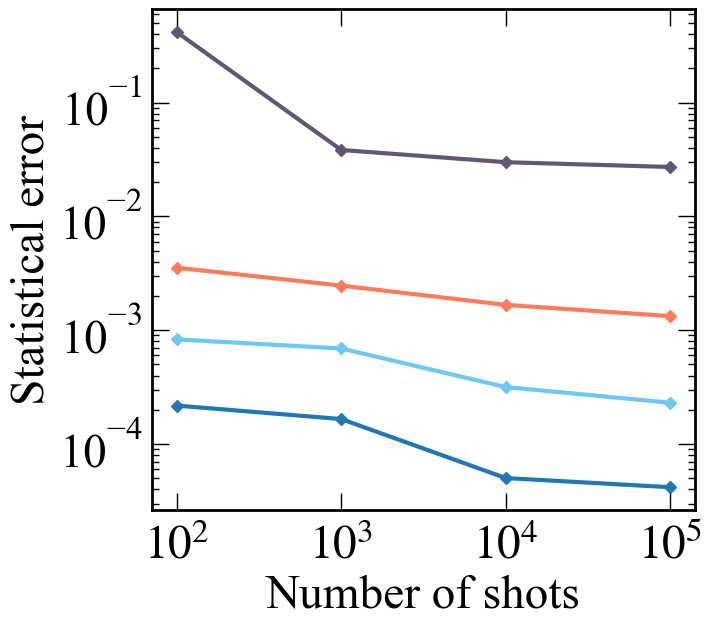

In [3]:
sample_size_list = [100, 1000, 10000, 100000]
num_shots_list = [100, 1000, 10000, 100000]
Eg = -18.061784744262695
means = []
stds = []

for sample_size in sample_size_list:
    energies_list = []
    errors_list = []
    for num_shots in num_shots_list:
        file_name = f'data/qml-VMC-Heisenberg-Nq=10-reps=4-circular-{sample_size}-{num_shots}.pt'
        data = torch.load(file_name)
        energies = np.array(data['energies_seeds'][-100:])
        
        energies_list.append(energies)      
        error = np.abs((energies - Eg)) #  / Eg
        errors_list.append(error)
    
    energies_list = np.array(energies_list)
    errors_list = np.array(errors_list)  # (4, 50)
    mean = np.mean(errors_list, axis=1)
    std = np.std(energies_list, axis=1)
    means.append(mean)
    stds.append(std)


color = ['#625772', '#ff7b5c', '#6dc9f2', '#1f77b4']
plt.figure(figsize=(7, 6.5))
    
for i, sample_size in enumerate(sample_size_list):
    mean = means[i]
    std = stds[i]
    plt.plot(num_shots_list, std, label=r'$10^{{{}}}$'.format(i+2), color=color[i], marker='D', markersize=6, linestyle='-')
   
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of shots')
plt.ylabel('Statistical error')
#plt.ylim(None, 1e-1)
ax = plt.gca()
ax.set_xticks(num_shots_list)  
ax.set_xticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$', r'$10^{5}$'])
plt.tick_params(axis='x', which='minor', length=0)
#plt.legend(title='Sample size', title_fontsize=15, fontsize=15, loc='lower left') # , bbox_to_anchor=(0.05, 0)
plt.savefig('figures/statistical_error-sample_size-num_shots.pdf', dpi=600, bbox_inches='tight')
plt.show()

# 2. Eenrgy error vs System size

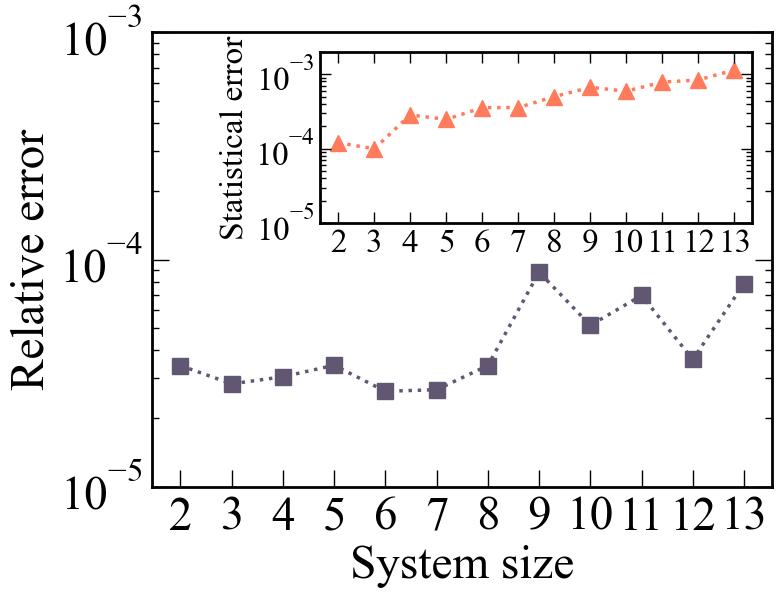

In [4]:
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 34,
    'xtick.major.size': 12,         
    'ytick.major.size': 12,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': False,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})

data_files = [
    ("2", torch.load(f'data/qml-VMC-Heisenberg-Nq=2-10000-10000.pt')),
    ("3", torch.load(f'data/qml-VMC-Heisenberg-Nq=3-10000-10000.pt')),
    ("4", torch.load(f'data/qml-VMC-Heisenberg-Nq=4-10000-10000.pt')),
    ("5", torch.load(f'data/qml-VMC-Heisenberg-Nq=5-10000-10000.pt')),
    ("6", torch.load(f'data/qml-VMC-Heisenberg-Nq=6-10000-10000.pt')),
    ("7", torch.load(f'data/qml-VMC-Heisenberg-Nq=7-10000-10000.pt')),
    ("8", torch.load(f'data/qml-VMC-Heisenberg-Nq=8-10000-10000.pt')),
    ("9", torch.load(f'data/qml-VMC-Heisenberg-Nq=9-10000-10000.pt')),
    ("10", torch.load(f'data/qml-VMC-Heisenberg-Nq=10-10000-10000.pt')),
    ("11", torch.load(f'data/qml-VMC-Heisenberg-Nq=11-10000-10000.pt')),
    ("12", torch.load(f'data/qml-VMC-Heisenberg-Nq=12-10000-10000.pt')),
    ("13", torch.load(f'data/qml-VMC-Heisenberg-Nq=13-10000-10000.pt')),
]

# mean and std of relative error
means = []
stds = []
labels = []
Egs = torch.load('data/Heisenberg_Egs.pt', weights_only=False)
for label, data in data_files:
    energies = np.array(data['energies_seeds'][-100:])
    Eg = Egs[int(label)]
    error = np.abs((energies - Eg) / Eg)  # / Eg
    means.append(np.mean(error))
    stds.append(np.std(energies))
    labels.append(int(label))
#labels = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

plt.figure(figsize=(8, 5.9))
plt.plot(labels, means, marker='s', markersize=12, linestyle=':', color='#625772', label='Relative Error')
plt.yscale('log')
plt.ylim(1e-5, 1e-3)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.xlabel('System size')
plt.ylabel('Relative error')
#plt.legend()


# subplot
inset_ax = plt.axes([0.335, 0.557, 0.54, 0.29])  # [left, bottom, width, height] 
inset_ax.plot(labels, stds, color='#ff7b5c', marker='^', markersize=12, linestyle=':', label='Statistical Error')
inset_ax.set_yscale("log")  
inset_ax.set_ylim(7e-5, 2e-3)
inset_ax.set_yticks([1e-5, 1e-4, 1e-3])
inset_ax.set_xlim(1.5, 13.5)
inset_ax.set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
#inset_ax.set_xlabel("Interatomic distances (Angstrom)", fontsize=8)
inset_ax.set_ylabel("Statistical error", fontsize=24)
#inset_ax.legend()
inset_ax.tick_params(
    axis='both',          
    which='both',         
    direction='in',       
    length=8,            
    width=1.0,            
    labelsize=24,         
    top=True,             
    right=True,    
    pad=4
)
inset_ax.tick_params(
    axis='both',         
    which='minor',       
    direction='in',      
    length=4,             
    width=1.0             
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0)  


plt.savefig('figures/relative_error_vs_system_size.pdf', dpi=600, bbox_inches='tight')
plt.show()

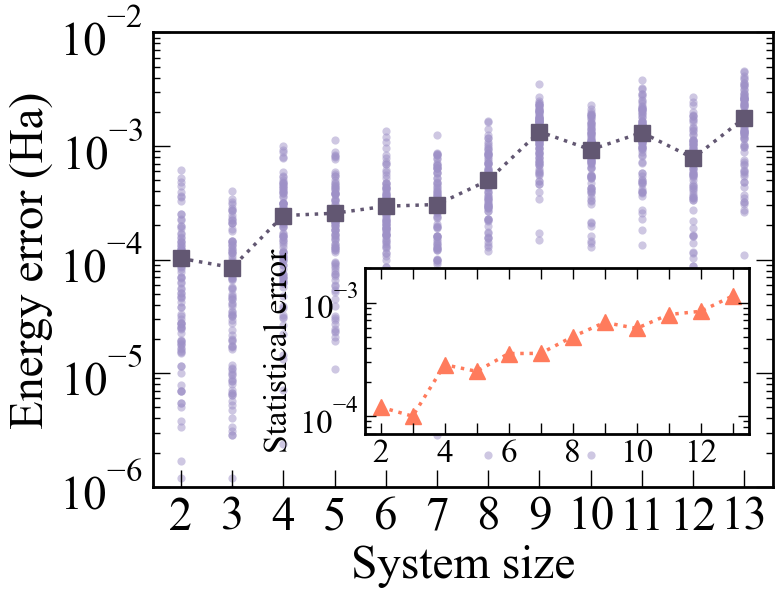

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 34,
    'xtick.major.size': 12,         
    'ytick.major.size': 12,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': False,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})

data_files = [
    ("2", torch.load(f'data/qml-VMC-Heisenberg-Nq=2-10000-10000.pt')),
    ("3", torch.load(f'data/qml-VMC-Heisenberg-Nq=3-10000-10000.pt')),
    ("4", torch.load(f'data/qml-VMC-Heisenberg-Nq=4-10000-10000.pt')),
    ("5", torch.load(f'data/qml-VMC-Heisenberg-Nq=5-10000-10000.pt')),
    ("6", torch.load(f'data/qml-VMC-Heisenberg-Nq=6-10000-10000.pt')),
    ("7", torch.load(f'data/qml-VMC-Heisenberg-Nq=7-10000-10000.pt')),
    ("8", torch.load(f'data/qml-VMC-Heisenberg-Nq=8-10000-10000.pt')),
    ("9", torch.load(f'data/qml-VMC-Heisenberg-Nq=9-10000-10000.pt')),
    ("10", torch.load(f'data/qml-VMC-Heisenberg-Nq=10-10000-10000.pt')),
    ("11", torch.load(f'data/qml-VMC-Heisenberg-Nq=11-10000-10000.pt')),
    ("12", torch.load(f'data/qml-VMC-Heisenberg-Nq=12-10000-10000.pt')),
    ("13", torch.load(f'data/qml-VMC-Heisenberg-Nq=13-10000-10000.pt')),
]

plt.figure(figsize=(8, 5.9))

# mean and std of relative error
means = []
stds = []
labels = []
Egs = torch.load('data/Heisenberg_Egs.pt', weights_only=False)
for label, data in data_files:
    energies = np.array(data['energies_seeds'][-100:])
    Eg = Egs[int(label)]
    error = np.abs((energies - Eg) )  # / Eg
    means.append(np.mean(error))
    stds.append(np.std(energies))
    labels.append(int(label))


plt.plot(labels, means, marker='s', markersize=12, linestyle=':', color='#625772', label='Relative Error')

for label, data in data_files:
    Nq = int(label)
    energies = np.array(data['energies_seeds'][:100])
    Eg = Egs[Nq]
    errors = np.abs((energies - Eg))  
    plt.scatter([Nq]*len(errors), errors, s=35, color='#9e91c7', alpha=0.5, edgecolors='k', linewidths=0.)

plt.yscale('log')
plt.ylim(1e-6, 1e-2)  # (1e-5, 3e-3)
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.xlabel('System size')
plt.ylabel('Energy error (Ha)')
#plt.legend()


# subplot
inset_ax = plt.axes([0.39, 0.2, 0.48, 0.28])  # [left 0.39, bottom, width, height] 
inset_ax.plot(labels, stds, color='#ff7b5c', marker='^', markersize=12, linestyle=':', label='Statistical Error')
inset_ax.set_yscale("log")  
inset_ax.set_ylim(7e-5, 2e-3)
inset_ax.set_yticks([7e-5, 1e-4, 1e-3])
inset_ax.set_xlim(1.5, 13.5)
inset_ax.set_xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
inset_ax.set_xticklabels(['2', '', '4', '', '6', '', '8', '', '10', '', '12', '']) 
#inset_ax.set_xlabel("Interatomic distances (Angstrom)", fontsize=8)
inset_ax.set_ylabel("Statistical error", fontsize=24)
#inset_ax.legend()
inset_ax.tick_params(
    axis='both',          
    which='both',         
    direction='in',       
    length=8,            
    width=1.0,            
    labelsize=24,         
    top=True,             
    right=True,    
    pad=4
)
inset_ax.tick_params(
    axis='both',         
    which='minor',       
    direction='in',      
    length=4,             
    width=1.0             
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0)  


plt.savefig('figures/energy_error_vs_system_size.pdf', dpi=600, bbox_inches='tight')
plt.show()

# 3. Sequential optimization with various quantum ansatz layers

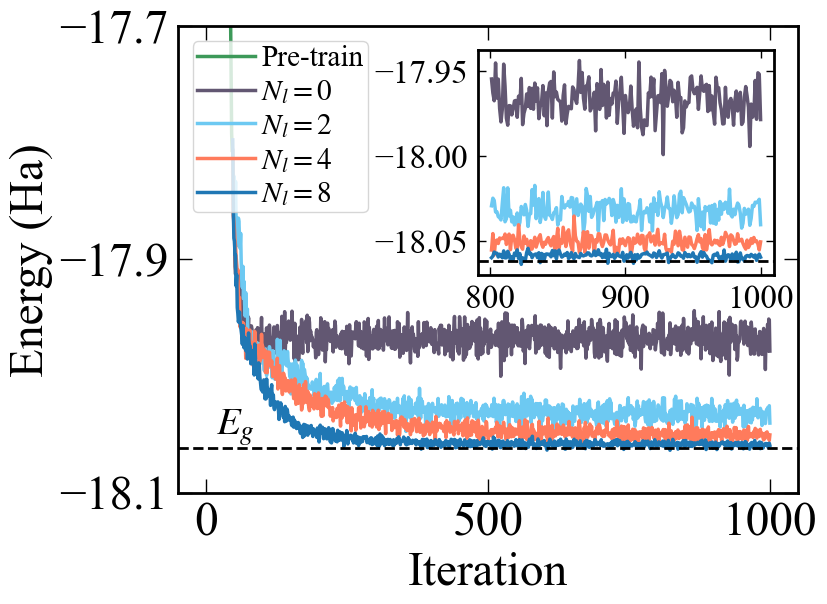

In [6]:
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 34,
    'xtick.major.size': 10,         
    'ytick.major.size': 10,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': True,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,        
})

color = ['#625772', '#6dc9f2','#ff7b5c',  '#1f77b4']

entanglement = 'linear' 
data0 = torch.load(f'data/NQS-VMC-Heisenberg-Nq=10-pre_train.pt')
data1 = torch.load(f'data/seq_opt-Heisenberg-Nq=10-reps=0-10000-None.pt')  
data2 = torch.load(f'data/seq_opt-Heisenberg-Nq=10-reps=2-{entanglement}-10000-None.pt')
data3 = torch.load(f'data/seq_opt-Heisenberg-Nq=10-reps=4-{entanglement}-10000-None.pt')
data4 = torch.load(f'data/seq_opt-Heisenberg-Nq=10-reps=8-{entanglement}-10000-None.pt')


Eg = -18.0617847
energies_NN = np.array(data0['energies'])
energies_QC1 = data1['energies'][:953]
energies_QC2 = data2['energies'][:953]
energies_QC3 = data3['energies'][:953]
energies_QC4 = data4['energies'][:953]

energies_NN = np.append(energies_NN, energies_QC1[0])


plt.figure(figsize=(8, 6.06))
plt.plot(range(1, 48), energies_NN, label='Pre-train',color='#3D9959')
plt.plot(range(48, 1001), energies_QC1, label=r'$N_l=0$', color=color[0])
plt.plot(range(48, 1001), energies_QC2, label=r'$N_l=2$', color=color[1])
plt.plot(range(48, 1001), energies_QC3, label=r'$N_l=4$', color=color[2])
plt.plot(range(48, 1001), energies_QC4, label=r'$N_l=8$', color=color[3])


plt.ylim(ymin=-18.1, ymax=-17.7)
plt.yticks([-18.1, -17.9, -17.7])
plt.axhline(y=Eg, color='black', linestyle='--', linewidth=2)
plt.text(17.5, -18.05, r'$E_g$', fontsize=28, color='black')
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.legend(loc='upper left', fontsize=21, borderpad=0.15, labelspacing=0.2, handletextpad=0.2)
plt.grid(False)


# subplot
inset_ax = plt.axes([0.5, 0.47, 0.37, 0.37])  
inset_ax.plot(range(801, 1001), energies_QC1[-200:], label='n_layers=0', color=color[0])
inset_ax.plot(range(801, 1001), energies_QC2[-200:], label='n_layers=1', color=color[1])
inset_ax.plot(range(801, 1001), energies_QC3[-200:], label='n_layers=2', color=color[2])
inset_ax.plot(range(801, 1001), energies_QC4[-200:], label='n_layers=4', color=color[3])
inset_ax.axhline(y=Eg, color='black', linestyle='--', linewidth=2)
inset_ax.set_yticks([-17.95, -18.0, -18.05]) 
inset_ax.set_xticks([800, 900, 1000]) 
inset_ax.tick_params(
    axis='both',         
    which='both',        
    length=6,           
    labelsize=24,        
    top=True,           
    right=True,    
    pad=7
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0) 

plt.savefig('figures/segmented_opt.pdf', dpi=600, bbox_inches='tight')
plt.show()

# 4. Heisenberg: Transformer v.s. Hybrid

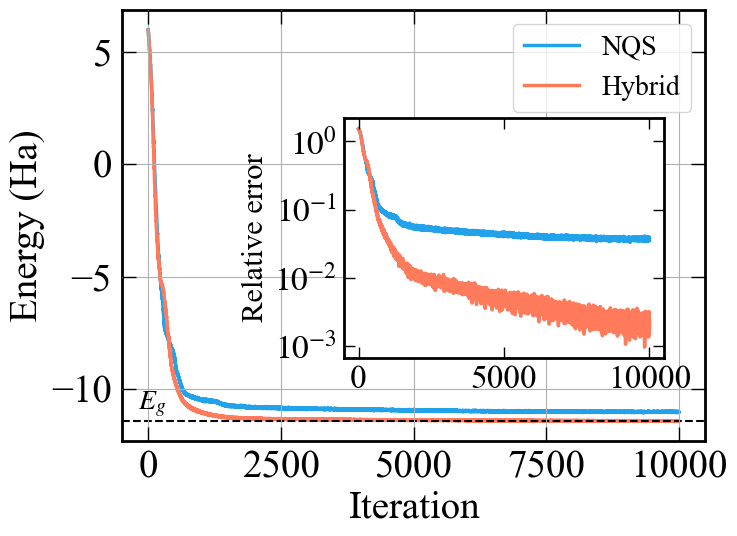

In [7]:
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 28,
    'xtick.major.size': 10,         
    'ytick.major.size': 10,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': True,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})
color = ['#21a2ea',  '#ff7b5c']

data_neural = np.load(f'data/Heisenberg-Nq=7-Adam-Transformer-n_embd=4.npz')
data_hybrid = np.load(f'data/Heisenberg-Nq=7-Adam-Hybrid-n_embd=4-num_shots=10000.npz') 
data_hybrid2 = np.load(f'data/Heisenberg-Nq=7-Adam-Hybrid-n_embd=4-num_shots=None.npz')


energies_neural = data_neural['energies']
energies_hybrid = data_hybrid['energies']
energies_hybrid2 = data_hybrid2['energies']

Eg = data_hybrid['Eg']


plt.figure(figsize=(8, 6))
plt.plot(energies_neural, label='NQS', color=color[0])
plt.plot(energies_hybrid, label=r'Hybrid', color=color[1]) # -shots=$10^4$

plt.axhline(y=Eg, color='black', linestyle='--', linewidth=1.5)
plt.text(-200, -10.9, r'$E_g$', fontsize=20, color='black')
plt.xticks([0,2500,5000,7500,10000])
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.grid(True)
plt.legend(fontsize=20)  
plt.tight_layout()


# subplot
inset_ax = plt.axes([0.47, 0.35, 0.4, 0.4])  
errors_neural = abs((energies_neural - Eg) / Eg)
errors_hybrid = abs((energies_hybrid - Eg) / Eg) 


inset_ax.plot(errors_neural, color=color[0])
inset_ax.plot(errors_hybrid, color=color[1])
inset_ax.set_yscale("log") 
inset_ax.set_yticks([1e-3, 1e-2, 1e-1, 1e0])
inset_ax.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
inset_ax.set_ylabel("Relative error", fontsize=22)
inset_ax.tick_params(
    axis='both',         
    which='major',        
    length=8,           
    labelsize=24,        
    top=True,            
    right=True,    
    pad=5
)
inset_ax.tick_params(
    axis='both',         
    which='minor',       
    direction='in',      
    length=4,           
    width=1.0            
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0) 

plt.savefig('figures/Heisenberg-hybrid_vs_transformer-shots=10000.pdf', dpi=600, bbox_inches='tight')
plt.show()

# 5. LiH

## 5.1 distance=2.4

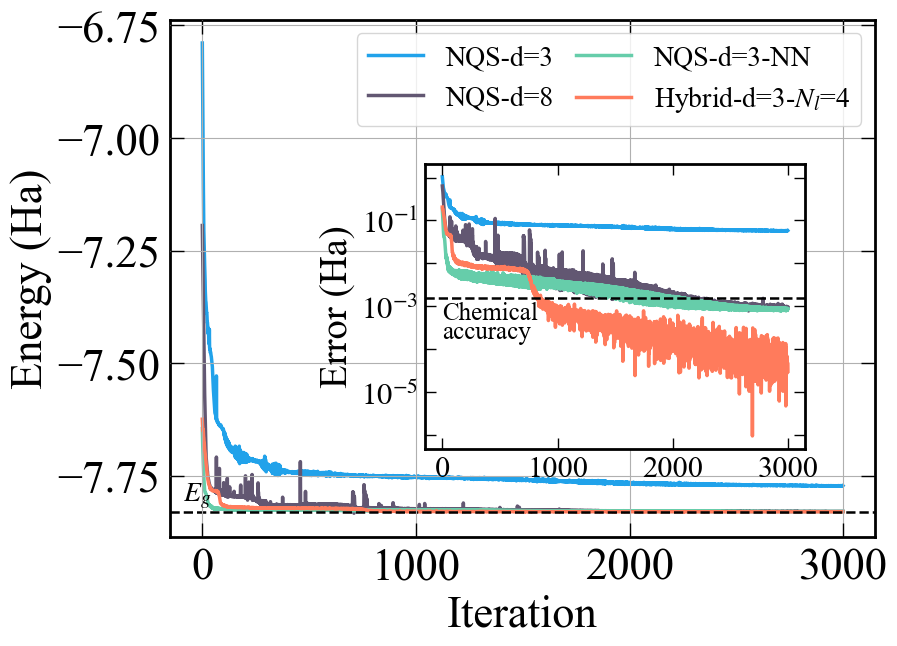

In [8]:
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 32,
    'xtick.major.size': 10,         
    'ytick.major.size': 10,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': True,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})
color = ['#21a2ea', '#625772', '#ff7b5c']

data_hybrid = np.load(f'data/LiH-hybrid-distance=2.4-n_embd=3-ansatz_reps=4.npz')  #-num_shots=None
data_neural = np.load(f'data/LiH-nqs-distance=2.4-n_embd=3.npz')
data_neural2 = np.load(f'data/LiH-nqs-distance=2.4-n_embd=8.npz')
data_2NQS2 = np.load(f'data/LiH-2NQS-distance=2.4-n_embd=3-ffwd=[40,40].npz')  



energies_hybrid = data_hybrid['energies']
energies_neural = data_neural['energies']
energies_neural2 = data_neural2['energies']
energies_2NQS2 = data_2NQS2['energies']


Eg = data_hybrid['Eg']
errors_neural = abs((energies_neural - Eg))
errors_neural2 = abs((energies_neural2 - Eg))
errors_hybrid = abs((energies_hybrid - Eg)) # / Eg
errors_2NQS2 = abs((energies_2NQS2 - Eg))


plt.figure(figsize=(9.5, 7.125))
plt.plot(energies_neural, label=r'NQS-d=3', color=color[0])
plt.plot(energies_neural2, label=r'NQS-d=8', color=color[1])
plt.plot(energies_2NQS2, label=r'NQS-d=3-NN', color='mediumaquamarine') # NN=1960
plt.plot(energies_hybrid, label=r'Hybrid-d=3-$N_l$=4', color=color[2])


plt.axhline(y=Eg, color='black', linestyle='--', linewidth=1.8)
plt.text(-90, -7.805, r'$E_g$', fontsize=20, color='black')
#plt.title('LiH-distance=2.4')
plt.xlabel('Iteration')
plt.ylabel('Energy (Ha)')
plt.grid(True)
plt.legend(fontsize=20, ncol=2, columnspacing=0.8)  
plt.tight_layout()


# subplot
inset_ax = plt.axes([0.464, 0.33, 0.4, 0.4])  

inset_ax.plot(errors_neural, color=color[0])
inset_ax.plot(errors_neural2, color=color[1])
inset_ax.plot(errors_2NQS2, color='mediumaquamarine')
inset_ax.plot(errors_hybrid, color=color[2])



inset_ax.axhline(y=0.0016, color='black', linestyle='--', linewidth=1.8)
inset_ax.text(0, 0.5e-3, 'Chemical', color='black', fontsize=18)
inset_ax.text(0, 0.18e-3, 'accuracy', color='black', fontsize=18)
inset_ax.set_yscale("log") 
inset_ax.set_yticks([1e-5, 1e-3, 1e-1]) 
inset_ax.set_ylabel("Error (Ha)", fontsize=28)
#inset_ax.set_yticks([-10.5, -11.5, -11.0]) 
inset_ax.set_xticks([0, 1000, 2000, 3000]) 
inset_ax.set_yticks([1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
inset_ax.set_yticklabels(['', '$10^{-5}$', '', '$10^{-3}$', '', '$10^{-1}$', ''])


inset_ax.tick_params(
    axis='both',         
    which='major',        
    length=8,           
    labelsize=22,         
    top=True,           
    right=True,    
    pad=5
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0)  

plt.savefig('figures/hybrid_vs_nqs-LiH-distance=2.4.pdf', dpi=600, bbox_inches='tight')
plt.show()

## 5.2 Energy surface

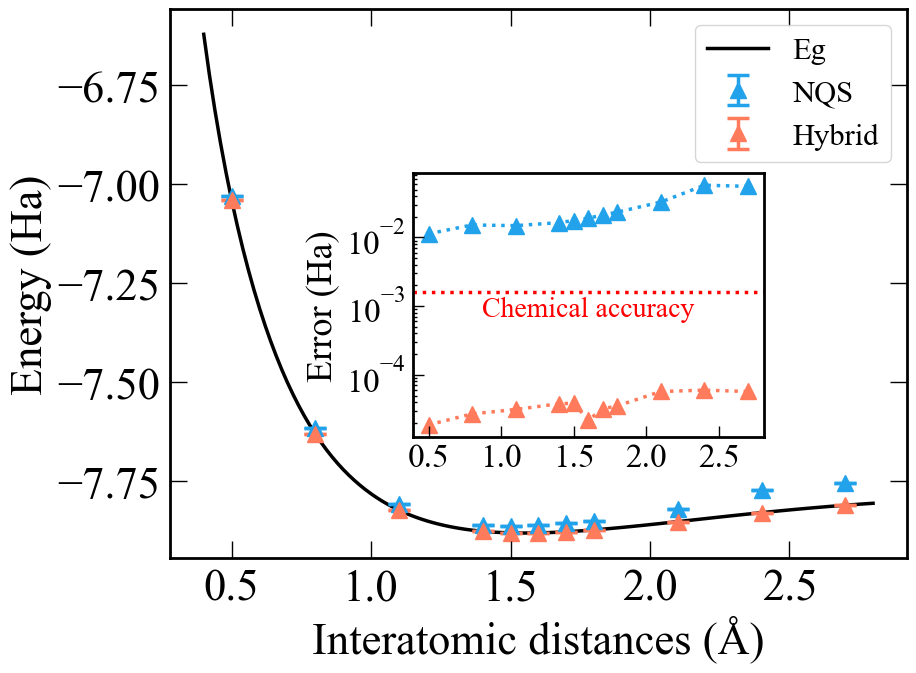

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 32,
    'xtick.major.size': 12,         
    'ytick.major.size': 12,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': True,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})
chemical_accuracy = 0.0016

# read the exact ground state energies of distances between 0.4 and 2.8
data = np.load(f'data/Eg_LiH.npz')
distances = data['distances']
Eg = data['Eg']

# read the estimated ground state energies
mean_energies_hybrid = []
std_energies_hybrid = []
mean_energies_nqs = []
std_energies_nqs = []
Eg_list = []
interatomic_distances = np.array([0.5, 0.8, 1.1, 1.4, 1.5, 1.6, 1.7, 1.8, 2.1, 2.4, 2.7])
for distance in interatomic_distances:
    data_hybrid = np.load(f'data/LiH-hybrid-distance={distance}-n_embd=3-ansatz_reps=4.npz')
    energies_hybrid = data_hybrid['energies']
    Eg_list.append(data_hybrid['Eg'])
    # calculate mean and standard deviation for the last 100 steps of energies at each distance
    mean_energies_hybrid.append(np.mean(energies_hybrid[-100:]))
    std_energies_hybrid.append(np.std(energies_hybrid[-100:]))
    
    data_nqs = np.load(f'data/LiH-nqs-distance={distance}-n_embd=3.npz')
    energies_nqs = data_nqs['energies']
    # calculate mean and standard deviation for the last 100 steps of energies at each distance
    mean_energies_nqs.append(np.mean(energies_nqs[-100:]))
    std_energies_nqs.append(np.std(energies_nqs[-100:]))
    

# plot mean and standard deviation as a function of distance
# color = ['#625772', '#f38181', '#a2d5f2', '#07689f']
plt.figure(figsize=(9.5, 7.125))
plt.plot(distances, Eg, color='black', linestyle='-', label='Eg')
plt.errorbar(interatomic_distances, mean_energies_nqs, yerr=std_energies_nqs, fmt='^', markersize=12, 
             capsize=8, capthick=2.5, label='NQS',color='#21a2ea')
plt.errorbar(interatomic_distances, mean_energies_hybrid, yerr=std_energies_hybrid, fmt='^', markersize=12,  
             capsize=8, capthick=2.5, label='Hybrid',color='#ff7b5c')
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5]) 
plt.ylabel('Energy (Ha)')
plt.xlabel(r'Interatomic distances (Å)')
plt.legend(fontsize=22)
['#218fcc', '#625772', '#ff7b5c']

# subplot
abs_error_nqs = np.abs(np.array(mean_energies_nqs) - np.array(Eg_list)) 
abs_error_hybrid = np.abs(np.array(mean_energies_hybrid) - np.array(Eg_list)) 
inset_ax = plt.axes([0.38, 0.28, 0.37, 0.37])  # [left, bottom, width, height] 
inset_ax.plot(interatomic_distances, abs_error_nqs, marker='^', markersize=12, linestyle=':',color='#21a2ea')
inset_ax.plot(interatomic_distances, abs_error_hybrid, marker='^', markersize=12, linestyle=':',color='#ff7b5c')
inset_ax.axhline(y=chemical_accuracy, linestyle=':',color='red')
inset_ax.set_yscale("log")  
inset_ax.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5]) 
#inset_ax.set_xlabel("Interatomic distances (Angstrom)", fontsize=8)
inset_ax.set_ylabel("Error (Ha)", fontsize=26)
inset_ax.tick_params(axis='both', which='major', labelsize=20)
inset_ax.tick_params(axis='both', which='minor', labelsize=20)
inset_ax.text(1.6, 0.9e-3, 'Chemical accuracy', fontsize=20, color='red', ha='center', va='center')
inset_ax.tick_params(
    axis='both',         
    which='both',        
    direction='in',       
    length=8,           
    width=1.0,           
    labelsize=24,        
    top=False,             
    right=False, 
    pad=5,
)
inset_ax.tick_params(
    axis='both',          
    which='minor',        
    direction='in',      
    length=3,             
    width=1.0            
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0)  


plt.savefig('figures/LiH-hybrid_vs_nqs.pdf', dpi=600, bbox_inches='tight')
plt.show()

# 6. N2 

## 6.1 distance=1.5

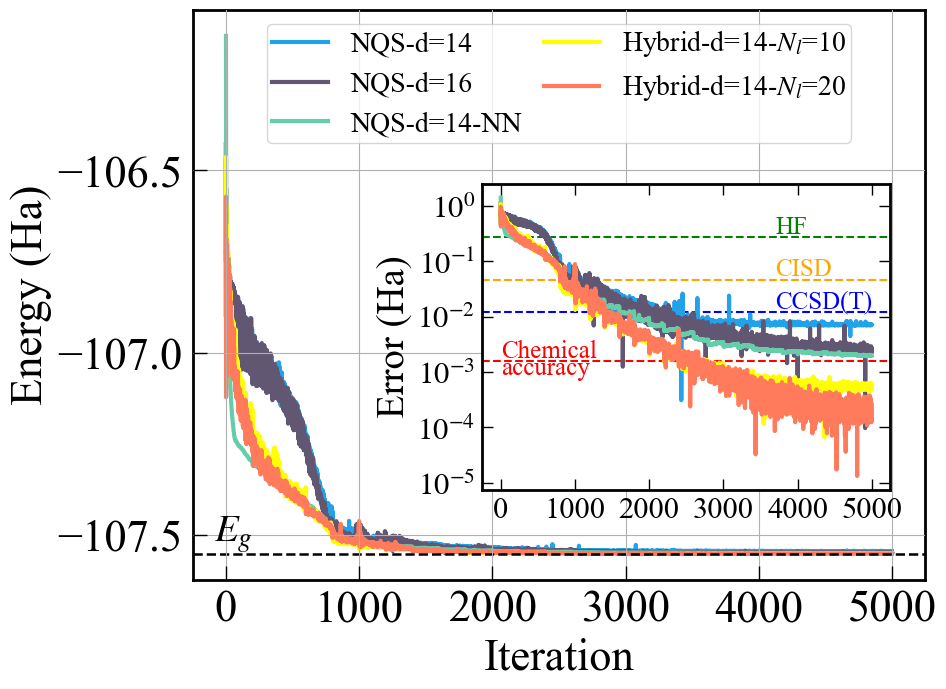

In [10]:
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 3.0,      # 2.0  
    'font.size': 32,
    'xtick.major.size': 10,         
    'ytick.major.size': 10,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': False,              
    'ytick.right': False,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})
dist = 1.5
with np.load('data/N2-12_qubit-scf_energies.npz') as data:
    distances = data['distances']
    idx = np.argmin(np.abs(distances - dist))
    hf_energy = data['HF'][idx]
    cisd_energy = data['CISD'][idx]
    ccsd_energy = data['CCSD'][idx]
    ccsdt_energy = data['CCSD(T)'][idx]
    fci_energy = data['FCI'][idx]


color = ['#21a2ea', '#625772', '#ff7b5c']

data_hybrid = torch.load(f'data/qml-VMC-N2-Nq=12-distance={dist}-[14,7,3]-[80, 80]-reps=20-circular-seed=111-phase1.pt')  #-num_shots=None
data_hybrid2 = torch.load(f'data/qml-VMC-N2-Nq=12-distance={dist}-[14,7,3]-[80,80]-reps=10-circular.pt')
data_neural = torch.load(f'data/NQS-VMC-N2-Nq=12-distance={dist}-[14,7,3]-[80,80].pt')
data_neural2 = torch.load(f'data/NQS-VMC-N2-Nq=12-distance={dist}-[16,4,3]-[96,96].pt')
data_2NQS = torch.load(f'data/2_NQS-VMC-N2-Nq=12-distance=1.5-[14,7,3]-[80, 80]-[40, 40]-seed=59.pt')  # seed=1337


energies_hybrid = data_hybrid['energies']
energies_hybrid2 = data_hybrid2['energies']
energies_neural = data_neural['energies']
energies_neural2 = data_neural2['energies']
energies_2NQS = data_2NQS['energies']


Eg = fci_energy
errors_neural = abs((energies_neural - Eg))
errors_neural2 = abs((energies_neural2 - Eg))
errors_hybrid = abs((energies_hybrid - Eg)) # / Eg
errors_hybrid2 = abs((energies_hybrid2 - Eg))
errors_2NQS = abs((energies_2NQS - Eg))


plt.figure(figsize=(10.2, 7.65))
plt.plot(energies_neural, label=r'NQS-d=14', color=color[0])  #, marker='o', markersize=2
plt.plot(energies_neural2, label=r'NQS-d=16', color=color[1])
steps = np.arange(len(energies_2NQS))
plt.plot(steps[1::2], energies_2NQS[1::2], label=r'NQS-d=14-NN', color='mediumaquamarine')  # NN=[40,40]
plt.plot(energies_hybrid2, label=r'Hybrid-d=14-$N_l$=10', color='yellow')
plt.plot(energies_hybrid, label=r'Hybrid-d=14-$N_l$=20', color=color[2])

plt.axhline(y=Eg, color='black', linestyle='--', linewidth=1.8)  
plt.text(-90, -107.52, r'$E_g$', fontsize=28, color='black')
#plt.title('N2-distance=1.5')
plt.xlabel('Iteration')
plt.xticks([0, 1000, 2000, 3000, 4000, 5000])
plt.ylabel('Energy (Ha)')
plt.grid(True)
plt.legend(fontsize=20, ncol=2, columnspacing=0.8, loc='upper center', borderpad=0.2)  
plt.tight_layout()


# subplot
inset_ax = plt.axes([0.51, 0.31, 0.4, 0.4])  

inset_ax.axhline(y=abs(hf_energy-fci_energy), color='green', linestyle='--', linewidth=1.5, label='HF error')
inset_ax.axhline(y=abs(cisd_energy-fci_energy), color='orange', linestyle='--', linewidth=1.5, label='CISD error')
inset_ax.axhline(y=abs(ccsd_energy-fci_energy), color='blue', linestyle='--', linewidth=1.5, label='CCSD error')
inset_ax.axhline(y=0.0016, color='red', linestyle='--', linewidth=1.5, label='Chemical accuracy')


inset_ax.plot(errors_neural, color=color[0])
inset_ax.plot(errors_neural2, color=color[1])
inset_ax.plot(steps[1::2], errors_2NQS[1::2], color='mediumaquamarine')
inset_ax.plot(errors_hybrid2, color='yellow')
inset_ax.plot(errors_hybrid, color=color[2])


inset_ax.text(3700, abs(hf_energy - fci_energy)*1.15, 'HF', color='green', fontsize=18)
inset_ax.text(3700, abs(cisd_energy - fci_energy)*1.15, 'CISD', color='orange', fontsize=18)
inset_ax.text(3700, abs(ccsdt_energy - fci_energy)*1.15, 'CCSD(T)', color='blue', fontsize=18)
inset_ax.text(0, 1.79e-3, 'Chemical', color='red', fontsize=18)
inset_ax.text(0, 0.89e-3, 'accuracy', color='red', fontsize=18)
inset_ax.set_yscale("log") 
inset_ax.set_ylabel("Error (Ha)", fontsize=28)
inset_ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000]) 
inset_ax.set_yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])
inset_ax.set_yticklabels(['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])


inset_ax.tick_params(
    axis='both',         
    which='major',        
    length=8,           
    labelsize=22,         
    top=True,           
    right=True,    
    pad=5
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0)  

plt.savefig('figures/hybrid_vs_nqs-N2-Nq=12-distance=1.5.pdf', dpi=600, bbox_inches='tight')
plt.show()

In [11]:
dist = 1.5  #1.2
with np.load('data/N2-12_qubit-scf_energies.npz') as data:
    distances = data['distances']
    idx = np.argmin(np.abs(distances - dist))
    hf_energy = data['HF'][idx]
    cisd_energy = data['CISD'][idx]
    ccsd_energy = data['CCSD'][idx]
    ccsdt_energy = data['CCSD(T)'][idx]
    fci_energy = data['FCI'][idx]

data_hybrid = torch.load(f'data/NQS-VMC-N2-Nq=12-distance={dist}-[16,4,3]-[96,96].pt') # -reps=20-circular
np.mean(data_hybrid['energies'][-100:]-fci_energy) #['energies'][4900:5000]

np.float64(0.002508648620641907)

## 6.2 Energy surface

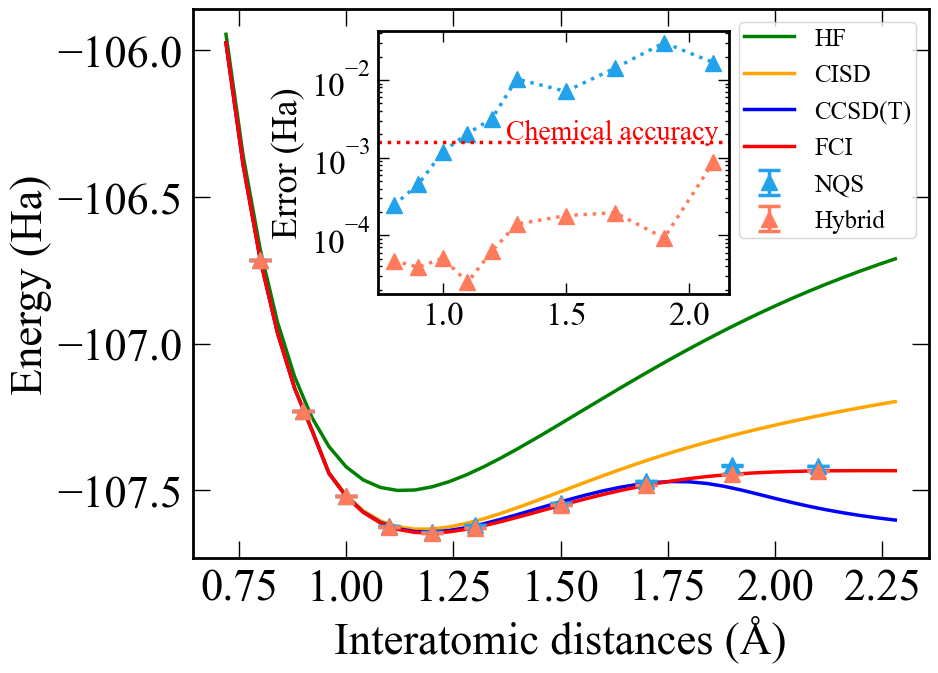

In [5]:
# set global parameters
plt.rcParams.update({
    'axes.linewidth': 2.0,        
    'xtick.major.width': 1.0,   
    'ytick.major.width': 1.0,    
    'xtick.minor.width': 1.0,     
    'ytick.minor.width': 1.0,     
    'lines.linewidth': 2.5,       
    'font.size': 32,
    'xtick.major.size': 12,         
    'ytick.major.size': 12,         
    'xtick.minor.size': 5,          
    'ytick.minor.size': 5,          
    'xtick.direction': 'in',        
    'ytick.direction': 'in',    
    'xtick.top': True,              
    'ytick.right': True,
    'axes.axisbelow': False, 
    'xtick.major.pad': 7,  
    'ytick.major.pad': 7,         
})
chemical_accuracy = 0.0016
interatomic_distances = np.array([0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.7, 1.9, 2.1])

plt.figure(figsize=(9.5, 7.125))
fci_energy_list = []
ccsdt_energy_list = []
# load HF, CISD, CCSD and FCI energies
with np.load('data/N2-12_qubit-scf_energies.npz') as data: 
    dist = data['distances'][12:]
    hf = data['HF'][12:]
    cisd = data['CISD'][12:]
    ccsd = data['CCSD'][12:]
    ccsdt = data['CCSD(T)'][12:]
    fci = data['FCI'][12:]
    for dist_selected in interatomic_distances:
        idx = np.argmin(np.abs(dist_selected - dist))
        fci_energy_list.append(fci[idx])
        ccsdt_energy_list.append(ccsdt[idx])

# draw energy curves
step = 4  
plt.plot(dist[::step], hf[::step], color='green', linestyle='-', label='HF')
plt.plot(dist[::step], cisd[::step], color='orange', linestyle='-', label='CISD')
#plt.plot(dist[::step], ccsd[::step], color='blue', linestyle='-', label='CCSD')
plt.plot(dist[::step], ccsdt[::step], color='blue', linestyle='-', label='CCSD(T)')
plt.plot(dist[::step], fci[::step], color='red', linestyle='-', label='FCI')

    

# read the estimated ground state energies
mean_energies_hybrid = []
std_energies_hybrid = []
mean_energies_nqs = []
std_energies_nqs = []
for distance in interatomic_distances:

    data_hybrid = torch.load(f'data/qml-VMC-N2-Nq=12-distance={distance}-[14,7,3]-[80,80]-reps=20-circular.pt')
    energies_hybrid = data_hybrid['energies']
    # calculate mean and standard deviation for the last 100 steps of energies at each distance
    mean_energies_hybrid.append(np.mean(energies_hybrid[-100:]))
    std_energies_hybrid.append(np.std(energies_hybrid[-100:]))

    data_nqs = torch.load(f'data/NQS-VMC-N2-Nq=12-distance={distance}-[14,7,3]-[80,80].pt')
    energies_nqs = data_nqs['energies']
    # calculate mean and standard deviation for the last 100 steps of energies at each distance
    mean_energies_nqs.append(np.mean(energies_nqs[-100:]))
    std_energies_nqs.append(np.std(energies_nqs[-100:]))
    

# plot mean and standard deviation as a function of distance
plt.errorbar(interatomic_distances, mean_energies_nqs, yerr=std_energies_nqs, fmt='^', markersize=12, 
             capsize=8, capthick=2.5, label='NQS',color='#21a2ea')
plt.errorbar(interatomic_distances, mean_energies_hybrid, yerr=std_energies_hybrid, fmt='^', markersize=12,  
             capsize=8, capthick=2.5, label='Hybrid',color='#ff7b5c')
plt.xticks([0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25]) 
#plt.xticks([0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.7, 1.9, 2.1]) 
plt.ylabel('Energy (Ha)')
plt.xlabel(r'Interatomic distances (Å)')
plt.legend(fontsize=18, loc = 'upper right', borderpad=0.2)


# subplot
error_nqs = np.abs(np.array(mean_energies_nqs) - np.array(fci_energy_list)) 
error_hybrid = np.abs(np.array(mean_energies_hybrid) - np.array(fci_energy_list)) 
#error_ccsdt = np.abs(np.array(ccsdt_energy_list) - np.array(fci_energy_list)) 
inset_ax = plt.axes([0.32, 0.48, 0.37, 0.37])  # [left, bottom, width, height] 
inset_ax.plot(interatomic_distances, error_nqs, marker='^', markersize=12, linestyle=':',color='#21a2ea')
inset_ax.plot(interatomic_distances, error_hybrid, marker='^', markersize=12, linestyle=':',color='#ff7b5c')
#inset_ax.plot(interatomic_distances, error_ccsdt, marker='^', markersize=12, linestyle=':',color='green')
inset_ax.axhline(y=chemical_accuracy, linestyle=':',color='red')
inset_ax.set_yscale("log")  
inset_ax.set_xticks([1.0, 1.5, 2.0]) 
#inset_ax.set_xlabel("Interatomic distances (Angstrom)", fontsize=8)
inset_ax.set_yticks([1e-4, 1e-3, 1e-2])
inset_ax.set_ylabel("Error (Ha)", fontsize=26)
inset_ax.tick_params(axis='both', which='major', labelsize=20)
inset_ax.tick_params(axis='both', which='minor', labelsize=20)
inset_ax.text(1.69, 2.15e-3, 'Chemical accuracy', fontsize=20, color='red', ha='center', va='center')
inset_ax.tick_params(
    axis='both',         
    which='both',        
    direction='in',       
    length=8,           
    width=1.0,           
    labelsize=24,        
    top=True,             
    right=True, 
    pad=5,
)
inset_ax.tick_params(
    axis='both',          
    which='minor',        
    direction='in',      
    length=3,             
    width=1.0            
)
for spine in inset_ax.spines.values():
    spine.set_linewidth(2.0)  


#plt.savefig('figures/N2-hybrid_vs_nqs.pdf', dpi=600, bbox_inches='tight')
plt.show()